In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Here is a description of the assignment and the drill from Thinkful's Curriculum.  My work on the drill is represented in the cells thereafter.

- There are a *lot* of different clustering methods – we're going to review just three more here: _Mean-shift_, _Spectral Clustering_, and _Affinity Propagation_.  If you want to go even broader, check out this [comparison among all the clustering algorithms available in sklearn](http://scikit-learn.org/stable/modules/clustering.html).

- For all three methods, we'll be using the same simulated dataset, with three "blobs."  We won't need to normalize the data since it is simulated and comes pre-normalized, but with real data normalization will be important to make sure all your features are given equal weight in finding a clustering solution.

- You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

#### My Trials:

#### Blob 1:

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
sns.set_style('darkgrid')

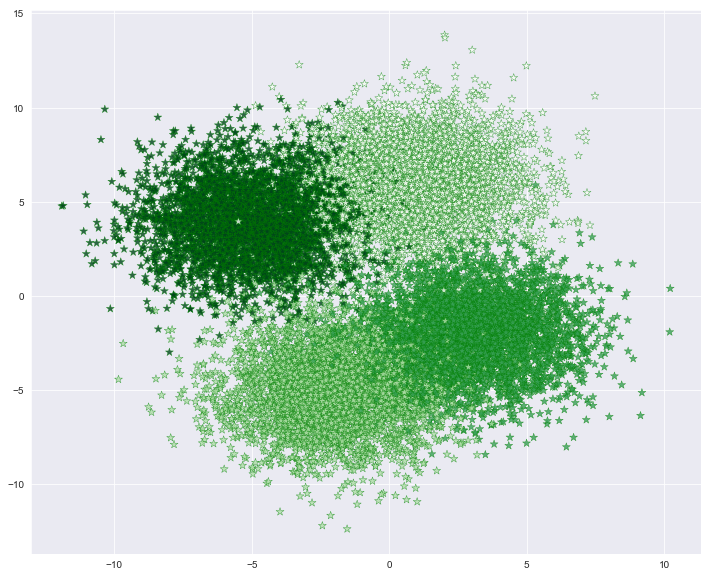

In [3]:
# Blobs: 4 - more spread out:
centers_1 = [[1, 6], [-2, -5], [3, -2], [-5, 4]]

# Make 15,000 rows worth of data with three features representing four clusters, each having an std of 2.

X, y = make_blobs(
    n_samples=15000,
    centers=centers_1,
    cluster_std=2,
    n_features=3,
    random_state=42)

plt.figure(figsize = (12, 10))
plt.scatter(X[:, 0], X[:, 1], s = 70, c=y, cmap = 'Greens', marker = '*', 
            alpha = .8, linewidth = .4, edgecolors = 'Green')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Here, we have a dataset with four clusters, not too far apart, but not too close.  We also have 15,000 samples.  Below, we will see how our four algorithms perform and what they come up with for clusters in this context.

#### KMeans

In [4]:
KMeans_1 = KMeans(n_clusters = 4)
KMeans_1_pred_ = KMeans_1.fit_predict(X_train)

#### KMeansShift

In [5]:
bandwidth = estimate_bandwidth(X_train, quantile = .05, n_samples = 500)
KMeansShift_2 = MeanShift(bandwidth = bandwidth, bin_seeding = True)

KMeanShift_2_pred_ = KMeansShift_2.fit_predict(X_train) #.05 / 500

shift_labels = KMeansShift_2.labels_
n_clusters_ = len(np.unique(KMeansShift_2.labels_))

print(bandwidth)

1.9009377345197702


#### Spectral Clustering

In [6]:
SC_2 = SpectralClustering(n_clusters = 4)
SC_2_pred_ = SC_2.fit_predict(X_train) #hey howdy hey

#### Affinity Propagation

In [7]:
Affinity_1 = AffinityPropagation()
Affinity_1_pred_ = Affinity_1.fit_predict(X_train)

#### Graphs:

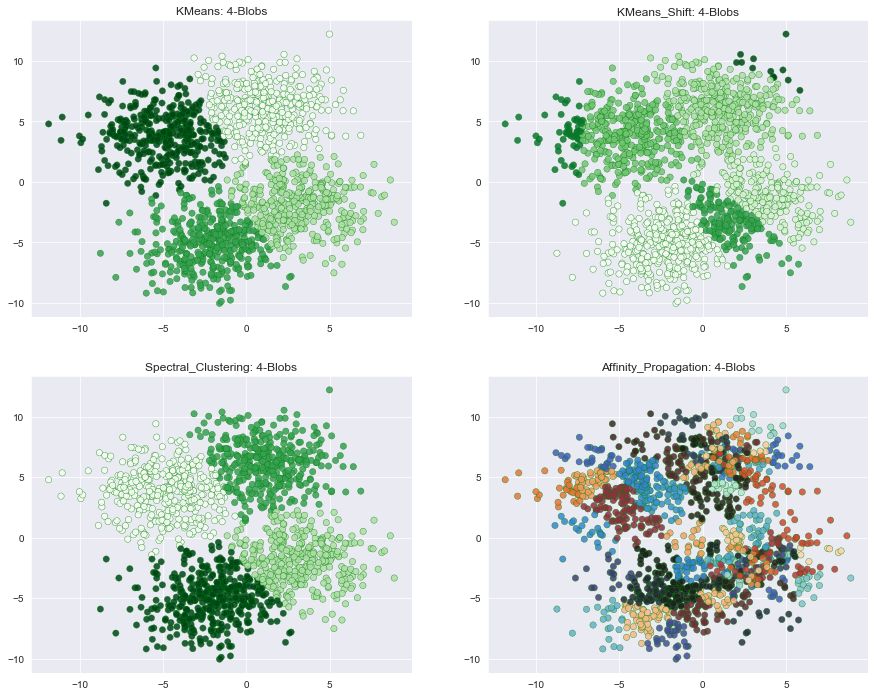

In [8]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 12))

ax1.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = KMeans_1_pred_, marker = 'o',
            cmap = 'Greens', alpha = .85, linewidth = .4, edgecolors = 'Green')
ax1.set_title('KMeans: 4-Blobs')

ax2.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = KMeanShift_2_pred_, marker = 'o',
            cmap = 'Greens', alpha = .85, linewidth = .4, edgecolors = 'Green')
ax2.set_title('KMeans_Shift: 4-Blobs')

ax3.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = SC_2_pred_, marker = 'o',
            cmap = 'Greens', alpha = .85, linewidth = .4, edgecolors = 'Green')
ax3.set_title('Spectral_Clustering: 4-Blobs')

ax4.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = Affinity_1_pred_, marker = 'o',
            cmap = 'icefire', alpha = .85, linewidth = .4, edgecolors = 'Green')
ax4.set_title('Affinity_Propagation: 4-Blobs')

plt.show()


   It looks as if our KMeans and Spectral Classification algorithms gave us a standard, vairly well-defined classification of the data: there isn't too much overlap, no outliers, and a well-defined distinction between each of the clusters.  The KMeansh shift is interesting, especially when we alter the bandwidth.  A smaller bandwidth leads to more clusters/classification groups while a large bandwidth leads to a lesser amount (classifying all the datapoints under one group if the bandwidth is large enough).  That said, the boundaries are relatively well-defined.  While this might be considered over-fitting, it could be useful for the researcher in discovering nuances to patterns, or new patterns that might not have been considered.

   Our Affinity Propagation is more difficult to sort out.  It finds lots of relationships all over the dataset, thereby casting 'cluster-nets throughout the dataset in a less-distinguishable way when compared to our previous models. While there are a handful of distinguished groups throughout the dataset, the lack of regularity could make prediction more difficult. While this demonstrates a significant amount of over-fitting, the connections between datapoints could be instrumental for the researcher in developing future studies.

### Blob 2:

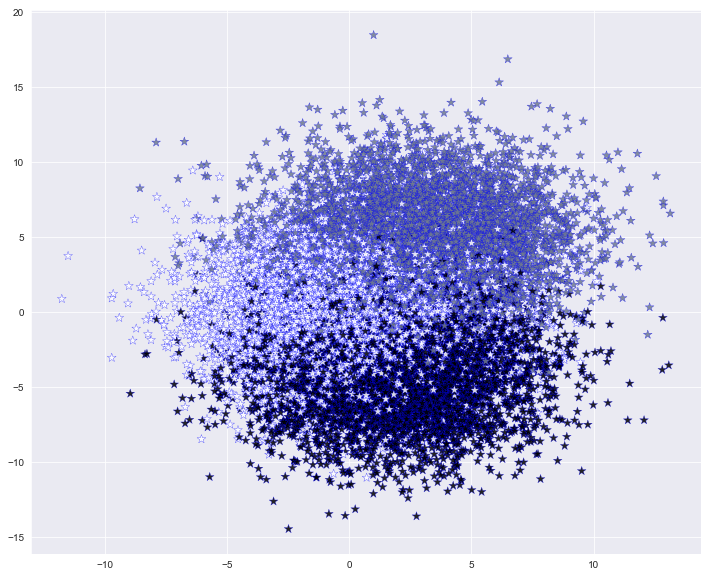

In [9]:
# Blobs: 3. Relatively close
centers_2 = [[0, 0], [3, 5], [2, -4]]

# Make 15,000 rows worth of data with 6 features representing 3 clusters, each having an std of 3.

X, y = make_blobs(
    n_samples=15000,
    centers=centers_2,
    cluster_std=3,
    n_features=6,
    random_state=42)

plt.figure(figsize = (12, 10))
plt.scatter(X[:, 0], X[:, 1], s = 85, c=y, marker = '*', cmap = 'bone_r', 
            alpha = .85, linewidth = .3, edgecolors = 'Blue')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### KMeans

In [10]:
KMeans_2 = KMeans(n_clusters = 3)
KMeans_2_pred_ = KMeans_2.fit_predict(X_train)

#### KMeansShift

In [11]:
bandwidth = estimate_bandwidth(X_train, quantile = .02, n_samples = 500)
KMeansShift_3 = MeanShift(bandwidth = bandwidth, bin_seeding = True)

KMeanShift_3_pred_ = KMeansShift_3.fit_predict(X_train)

shift_labels = KMeansShift_3.labels_
n_clusters_ = len(np.unique(KMeansShift_3.labels_))

print(bandwidth)

1.30041828718904


#### Spectral Clustering

In [12]:
SC_3 = SpectralClustering(n_clusters = 3)
SC_3_pred_ = SC_3.fit_predict(X_train)

#### Affinity Propagation

In [13]:
Affinity_2 = AffinityPropagation()
Affinity_2_pred_ = Affinity_2.fit_predict(X_train)

#### Graphs:

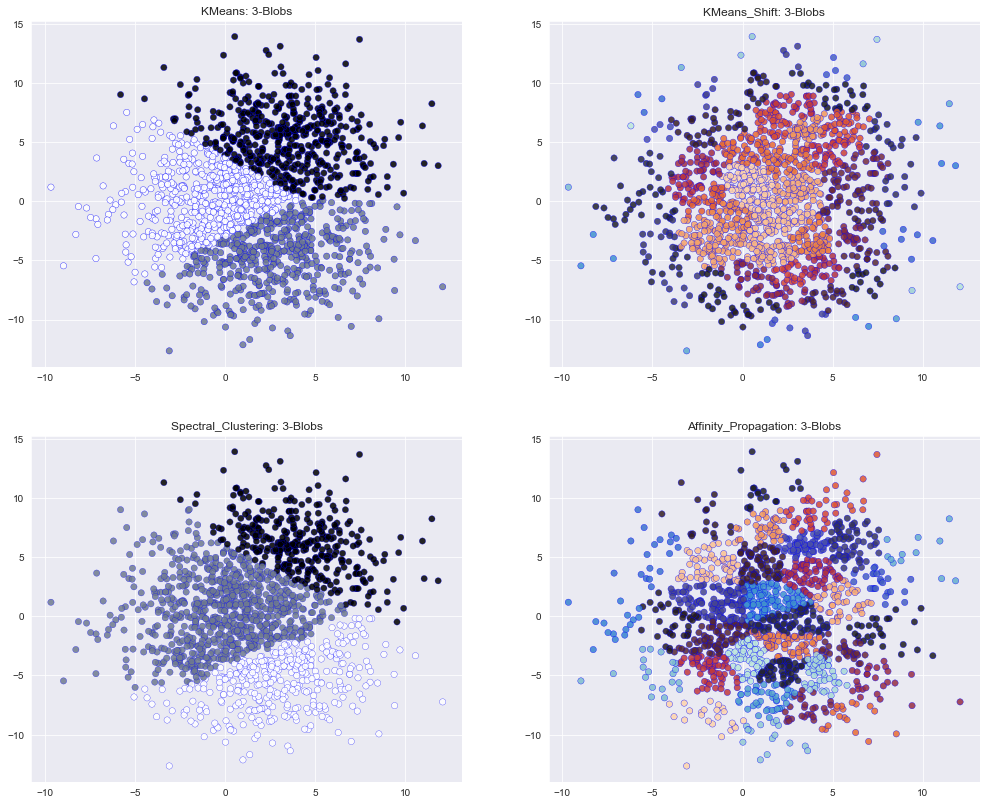

In [14]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (17, 14))

ax1.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = KMeans_2_pred_, marker = 'o',
            cmap = 'bone_r', alpha = .85, linewidth = .4, edgecolors = 'Blue')
ax1.set_title('KMeans: 3-Blobs')

ax2.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = KMeanShift_3_pred_, marker = 'o',
            cmap = 'icefire_r', alpha = .85, linewidth = .4, edgecolors = 'Blue')
ax2.set_title('KMeans_Shift: 3-Blobs')

ax3.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = SC_3_pred_, marker = 'o',
            cmap = 'bone_r', alpha = .85, linewidth = .3, edgecolors = 'Blue')
ax3.set_title('Spectral_Clustering: 3-Blobs')

ax4.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = Affinity_2_pred_, marker = 'o',
            cmap = 'icefire', alpha = .85, linewidth = .4, edgecolors = 'Blue')
ax4.set_title('Affinity_Propagation: 3-Blobs')

plt.show()


   In the above graphs, we have cluster-sets which are similar to the first set of graphs specifically in the context of KMeans and Spectral Classification.  Both graphs represent groups that are relatively well defined and easy to use for predictions.  The other two (namely KMeansShift and the Affinity Apropriation) are similar to our Affinity Propagation above: they both seem to overfit and find connections throughout the dataset when might not usually be predicted.

### Blob 3:

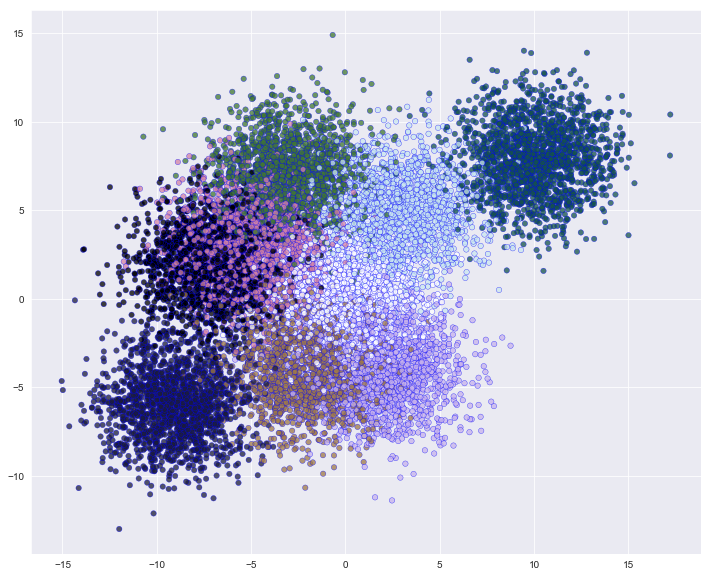

In [15]:
# Blobs: 6 - more spread out:
centers_3 = [[0, 0], [3, 5], [2, -4], [-5, 3], [-2, -4],
             [-3, 7], [10, 8], [-9, -6], [-7, 2]]

# Make 15,000 rows worth of data with 5 features representing 9 clusters, each having an std of 2.

X, y = make_blobs(
    n_samples=15000,
    centers=centers_3,
    cluster_std=2,
    n_features=5,
    random_state=42)

plt.figure(figsize = (12, 10))
plt.scatter(X[:, 0], X[:, 1], s = 30, c=y, marker = 'o', cmap = 'cubehelix_r', 
            alpha = .75, linewidth = .4, edgecolors = 'Blue')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### KMeans

In [16]:
KMeans_3 = KMeans(n_clusters = 9)
KMeans_3_pred_ = KMeans_3.fit_predict(X_train)

#### KMeansShift

In [17]:
bandwidth = estimate_bandwidth(X_train, quantile = .02, n_samples = 500)
KMeansShift_4 = MeanShift(bandwidth = bandwidth, bin_seeding = True)

KMeanShift_4_pred_ = KMeansShift_4.fit_predict(X_train)

shift_labels = KMeansShift_4.labels_
n_clusters_ = len(np.unique(KMeansShift_4.labels_))

print(bandwidth)

1.462131228945677


#### Spectral Clustering

In [18]:
SC_4 = SpectralClustering(n_clusters = 9)
SC_4_pred_ = SC_4.fit_predict(X_train)

#### Affinity Propagation

In [19]:
Affinity_3 = AffinityPropagation()
Affinity_3_pred_ = Affinity_3.fit_predict(X_train)

#### Graphs:

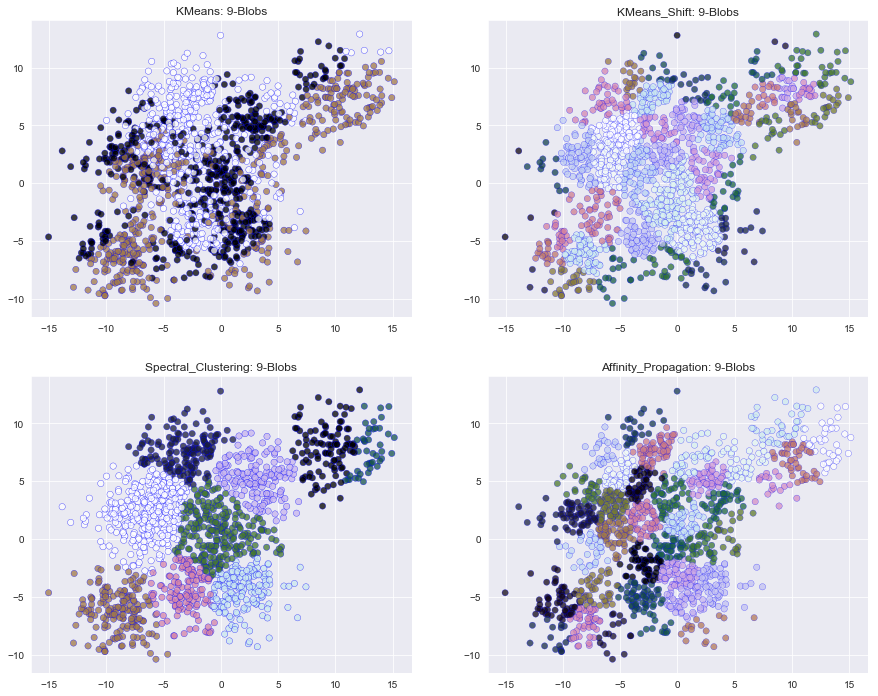

In [20]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 12))

ax1.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = KMeans_2_pred_, marker = 'o',
            cmap = 'cubehelix', alpha = .75, linewidth = .4, edgecolors = 'Blue')
ax1.set_title('KMeans: 9-Blobs')

ax2.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = KMeanShift_4_pred_, marker = 'o',
            cmap = 'cubehelix_r', alpha = .75, linewidth = .3, edgecolors = 'Blue')
ax2.set_title('KMeans_Shift: 9-Blobs')

ax3.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = SC_4_pred_, marker = 'o',
            cmap = 'cubehelix', alpha = .75, linewidth = .4, edgecolors = 'Blue')
ax3.set_title('Spectral_Clustering: 9-Blobs')

ax4.scatter(x = X_train[:, 0], y = X_train[:, 1], s = 40, c = Affinity_3_pred_, marker = 'o',
            cmap = 'cubehelix', alpha = .75, linewidth = .3, edgecolors = 'Blue')
ax4.set_title('Affinity_Propagation: 9-Blobs')
plt.show()


Here, as the cluster amount increases, we see our Spectral algorithm resembling our previous Affinity classifications (i.e. more datapoints in different clusters, less definition (albeit slight)).  Interestingly enough, our KMeans algorithm is no longer as reliable (from a prediction standpoint) as the others and only includes three classifications (not necessarily a bad thing, but depends on the context you are working in).  Three classifications, as opposed to nine, would provide less over-fitting, and more of a global perspective, but your distinctions between classes could be difficult to make sense of. 